# Pymaceuticals, Inc. Drug Regimen Analysis

# Summary of Analysis
Starting with the mouse data and the study results, first we combined the data to get a complete overview of the results. Then we verified that we had the complete dataset for all 249 mice and looked for any duplicate data by comparing the individual mice to the timepoints. We noticed there was one duplicate entry, so we removed this from our data set leaving us with results for 248 mice. 

Now that the duplicate was removed, we calculated mean, median, variance, standard deviation, and the standard error mean for the tumor volumes of each drug regimen. Then we created a bar plot to show the timepoints for each mouse. We generated a pie chart to see the sex distribution across the study data. We showed the Final tumor volumes for Capomulin, Ramicane, Infubinol, and Ceftamin in a box plot and looked for outliers for each regimen. Using a line chart we observed the tumor volume vs timepoints for individual mice treated with Capomulin. Finally we created a scatter plot of mouse weight vs. the average observed tumor volume with a trend line and calculated the correlation coefficient for Capomulin.
# Conclusions
  Capomulin and Ramicane had noticeably smaller mean, median, variance, standard deviation, and standard error means than the other regimens. This would indicate that the tumor volumes were lower more predictably with these two regimens. Given these results I would feel more confident with the study results for these two regimens.
  
Checking the line chart repeatedly with individual mice from the Capomulin regimen, the line graphs were consistent with a reduction in tumor volume over increasing time. Capomulin appears to be effective at reducing tumor volume.

The scatter plot and trend line show a strong correlation between increase in weight and average tumor volume. With a correlation coefficient of 0.84 there is a very positive trend between weight and tumor volume. This demonstrates that higher weight is a significant indicator of larger tumor volume. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

#Sort data and set rest the index
combined_data = combined_data.sort_values(['Timepoint','Metastatic Sites'], ascending = [True, False]).reset_index(drop = True)


# Display the data table for preview
combined_data.head()
# combined_data.count()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_ids = duplicate['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
value = duplicate_ids[0]
duplicate_data = combined_data.loc[combined_data['Mouse ID'] == value]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
389,g989,5,48.786801,0,Propriva,Female,21,26
390,g989,5,47.570392,0,Propriva,Female,21,26
646,g989,10,51.745156,0,Propriva,Female,21,26
647,g989,10,49.880528,0,Propriva,Female,21,26
782,g989,15,51.325852,1,Propriva,Female,21,26
872,g989,15,53.442020,0,Propriva,Female,21,26
1002,g989,20,55.326122,1,Propriva,Female,21,26
1003,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined_data.loc[combined_data['Mouse ID'] != value]
cleaned.head()
# cleaned.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()).rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
Median_Tumor_Volume = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()).rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
Tumor_Volume_Variance = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
Tumor_Volume_std = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev'})
Tumor_Volume_sem = pd.DataFrame(cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()).rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

summary_statistics = pd.merge(Mean_Tumor_Volume, Median_Tumor_Volume, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_Variance, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_std, how="inner", on=['Drug Regimen'])
summary_statistics = pd.merge(summary_statistics, Tumor_Volume_sem, how="inner", on=['Drug Regimen'])


summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_statistics = cleaned.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean','median','var', 'std', 'sem'])
aggregated_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

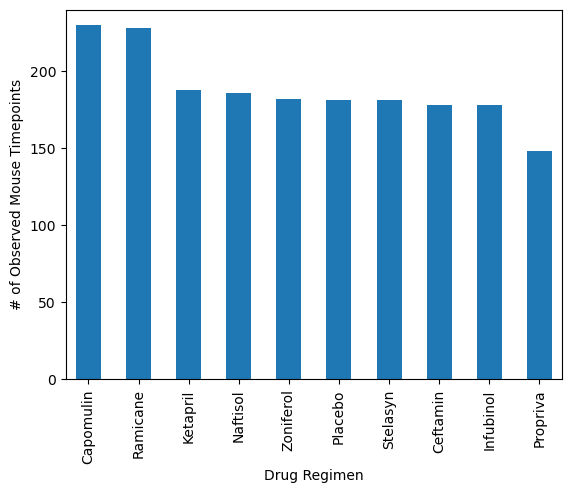

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#I verified that the Mouse ID and Timepoint returned the same value so just used Mouse ID
drug_mouse = pd.DataFrame(cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False))

drug_regimen = list(drug_mouse.index.values)
mouse_timepoints = list(drug_mouse['Mouse ID'])

#define bar graph in Pandas
pandaplot = drug_mouse.plot.bar(rot=89, color='tab:blue',legend=False)


#Set xticks, labels, and adjust size of plot area
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.45, len(drug_regimen)-0.55)
plt.ylim(0, max(mouse_timepoints) + 10)

#Showtime
plt.show()

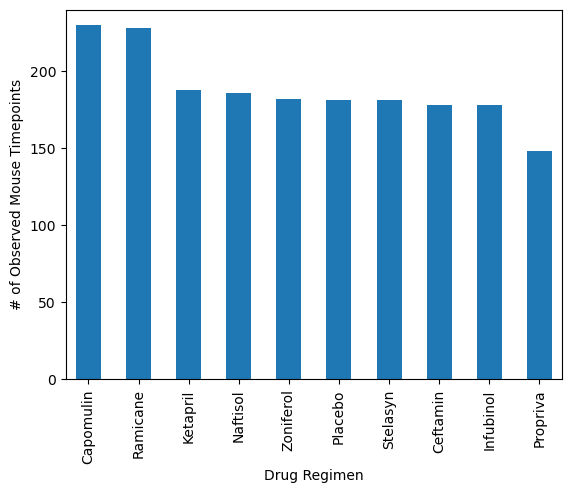

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#get x and y axis in list form
drug_regimen = list(drug_mouse.index.values)
mouse_timepoints = list(drug_mouse['Mouse ID'])

#define bar graph in pyplot
plt.bar(drug_regimen, mouse_timepoints, color='tab:blue', alpha=1, align="center", width=0.5)

#Set xticks, labels, and adjust size of plot area
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.45, len(drug_regimen)-0.55)
plt.ylim(0, max(mouse_timepoints) + 10)

#Showtime
plt.show()

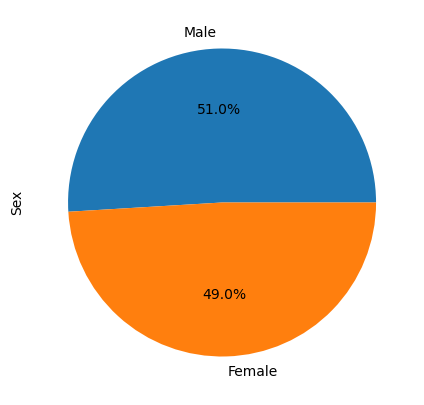

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#define dataframe and pie chart using Pandas
pandapie = pd.DataFrame(cleaned['Sex'].value_counts())
pandapie = pandapie.plot.pie(y='Sex', figsize=(5, 5), legend=False, autopct='%1.1f%%')



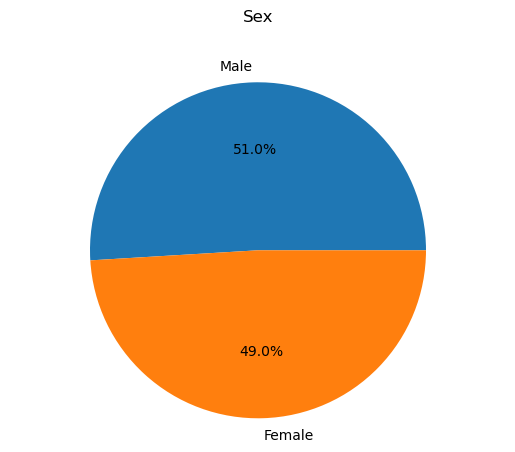

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate the number of male and female mice. num_mice is the total from above
sex_counts = cleaned['Sex'].value_counts()
male_percent = sex_counts[0]/num_mice *100
Female = sex_counts[1]/num_mice *100
sizes = [male_percent, Female]
labels = ['Male', 'Female']
plt.title('Sex',pad=32)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#Showtime
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
                                             
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_final_vol = cleaned.loc[cleaned['Drug Regimen'] == "Capomulin"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Ramicane_final_vol = cleaned.loc[cleaned['Drug Regimen'] == "Ramicane"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Infubinol_final_vol = cleaned.loc[cleaned['Drug Regimen'] == "Infubinol"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']
Ceftamin_final_vol = cleaned.loc[cleaned['Drug Regimen'] == "Ceftamin"].nlargest(1,['Timepoint'])['Tumor Volume (mm3)']



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Create data frames for each regimine
Capomulin_final_vol = pd.DataFrame({"Drug Regimen" : ["Capomulin"], "Final Tumor Voulume (mm3)" : Capomulin_final_vol}).set_index('Drug Regimen', drop=True)
Ramicane_final_vol = pd.DataFrame({"Drug Regimen" : ["Ramicane"], "Final Tumor Voulume (mm3)" : Ramicane_final_vol}).set_index('Drug Regimen', drop=True)
Infubinol_final_vol = pd.DataFrame({"Drug Regimen" : ["Infubinol"], "Final Tumor Voulume (mm3)" : Infubinol_final_vol}).set_index('Drug Regimen', drop=True)
Ceftamin_final_vol = pd.DataFrame({"Drug Regimen" : ["Ceftamin"], "Final Tumor Voulume (mm3)" : Ceftamin_final_vol}).set_index('Drug Regimen', drop=True)

#Combine the regimine dataframes
tumor_voulume = pd.concat([Capomulin_final_vol, Ramicane_final_vol, Infubinol_final_vol, Ceftamin_final_vol])

# Merge with original DataFrame. 
final_tumor_voulume = pd.merge(combined_data, tumor_voulume, how="right", on=['Drug Regimen']).fillna(method='ffill')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = final_tumor_voulume['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
regimen_vol_data = []
Capomulin_vol_data = []
Ramicane_vol_data = []
Infubinol_vol_data = []
Ceftamin_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calculate the IQR
Q1 = final_tumor_voulume['Tumor Volume (mm3)'].quantile(0.25)
Q3 = final_tumor_voulume['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1

# Determine if there are any outliers. All False are outliers. This returned 16 outliers and 798 within range so yes there are outliers
IQR_filtered = ((final_tumor_voulume['Tumor Volume (mm3)'] >= Q1 - 1.5*IQR) & (final_tumor_voulume['Tumor Volume (mm3)'] <= Q3 + 1.5*IQR)).value_counts()


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_tumor_voulume.iterrows():
        if row['Drug Regimen'] == regimen[0]:
            Capomulin_vol_data.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[1]:
            Ramicane_vol_data.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[2]:
            Infubinol_vol_data.append(row['Tumor Volume (mm3)'])
        elif row['Drug Regimen'] == regimen[3]:
            Ceftamin_vol_data.append(row['Tumor Volume (mm3)'])
        else:
            print("unexpected drug regimen")     
    
    # add subset 
regimen_vol_data = [Capomulin_vol_data, Ramicane_vol_data, Infubinol_vol_data, Ceftamin_vol_data]

# Create a DataFrame of Volume Data in columns of the regimens
Capomulin_vol_df = pd.DataFrame({regimen[0] : regimen_vol_data[0]})
Ramicane_vol_df = pd.DataFrame({regimen[1] : regimen_vol_data[1]})
Infubinol_vol_df = pd.DataFrame({regimen[2] : regimen_vol_data[2]})
Ceftamin_vol_df = pd.DataFrame({regimen[3] : regimen_vol_data[3]})

regimen_tumor_voulume = pd.concat([Capomulin_vol_df, Ramicane_vol_df, Infubinol_vol_df, Ceftamin_vol_df], axis=1)
    
# Determine outliers using upper and lower bounds for Capomulin
Capomulin_Q1 = regimen_tumor_voulume[regimen[0]].quantile(0.25)
Capomulin_Q3 = regimen_tumor_voulume[regimen[0]].quantile(0.75)
Capomulin_IQR = Capomulin_Q3 - Capomulin_Q1
Capomulin_IQR_filtered = ((regimen_tumor_voulume[regimen[0]] >= Capomulin_Q1 - 1.5*Capomulin_IQR) & 
                          (regimen_tumor_voulume[regimen[0]] <= Capomulin_Q3 + 1.5*Capomulin_IQR)).value_counts()

# Determine outliers using upper and lower bounds for Ramicane
Ramicane_Q1 = regimen_tumor_voulume[regimen[1]].quantile(0.25)
Ramicane_Q3 = regimen_tumor_voulume[regimen[1]].quantile(0.75)
Ramicane_IQR = Ramicane_Q3 - Ramicane_Q1
Capomulin_IQR_filtered = ((regimen_tumor_voulume[regimen[1]] >= Ramicane_Q1 - 1.5*Ramicane_IQR) & 
                          (regimen_tumor_voulume[regimen[1]] <= Ramicane_Q3 + 1.5*Ramicane_IQR)).value_counts()

# Determine outliers using upper and lower bounds for Infubinol
Infubinol_Q1 = regimen_tumor_voulume[regimen[2]].quantile(0.25)
Infubinol_Q3 = regimen_tumor_voulume[regimen[2]].quantile(0.75)
Infubinol_IQR = Infubinol_Q3 - Infubinol_Q1
Infubinol_IQR_filtered = ((regimen_tumor_voulume[regimen[2]] >= Infubinol_Q1 - 1.5*Infubinol_IQR) & 
                          (regimen_tumor_voulume[regimen[2]] <= Infubinol_Q3 + 1.5*Infubinol_IQR)).value_counts()

# Determine outliers using upper and lower bounds for Ceftamin
Ceftamin_Q1 = regimen_tumor_voulume[regimen[3]].quantile(0.25)
Ceftamin_Q3 = regimen_tumor_voulume[regimen[3]].quantile(0.75)
Ceftamin_IQR = Ceftamin_Q3 - Ceftamin_Q1
Ceftamin_IQR_filtered = ((regimen_tumor_voulume[regimen[3]] >= Ceftamin_Q1 - 1.5*Ceftamin_IQR) & 
                          (regimen_tumor_voulume[regimen[3]] <= Ceftamin_Q3 + 1.5*Ceftamin_IQR)).value_counts()


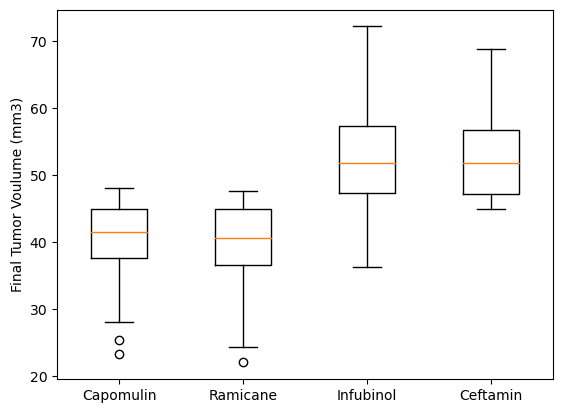

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(regimen_vol_data)
plt.xticks([1, 2, 3, 4], regimen)
ax1.set_ylabel("Final Tumor Voulume (mm3)")
plt.show()

## Line and Scatter Plots

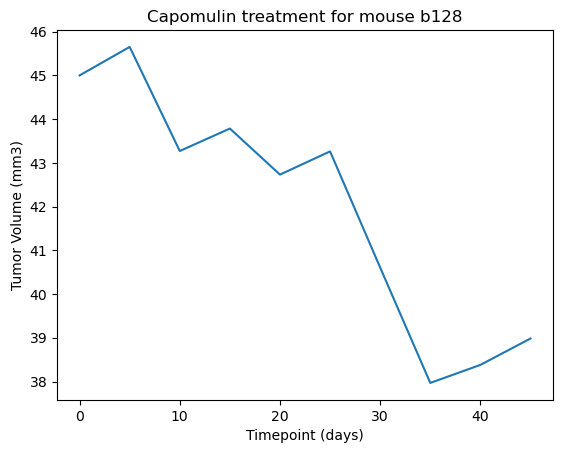

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Pick a mouse on Capomulin, Im showing the first, but I lloked at several for making my analysis.
line_mouse_id = final_tumor_voulume[final_tumor_voulume['Drug Regimen'] == regimen[0]].iloc[0]['Mouse ID']
# Get the tumor volumes and timepoints for this mouse
line_tumor_vols = final_tumor_voulume[final_tumor_voulume['Mouse ID'] == line_mouse_id]['Tumor Volume (mm3)'].tolist() 
line_timepoints = final_tumor_voulume[final_tumor_voulume['Mouse ID'] == line_mouse_id]['Timepoint'].tolist() 

# Create title string
title = regimen[0] + " treatment for mouse " + line_mouse_id

# Plot the line graph with x and y labels, and the title
plt.plot(line_timepoints, line_tumor_vols)
plt.ylabel("Tumor Volume (mm3)")  
plt.xlabel("Timepoint (days)")  
plt.title(title) 
plt.show()

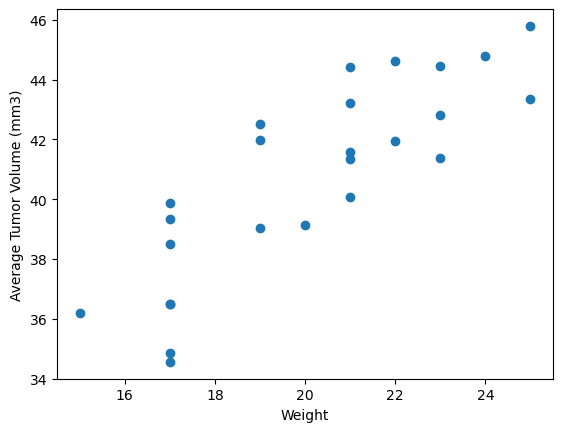

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create a subset of just mice on Caomulin
Capomulin_subset = final_tumor_voulume.loc[final_tumor_voulume['Drug Regimen'] == regimen[0]]

# get the average weight and tumor volume
average_weight = Capomulin_subset.groupby("Mouse ID")["Weight (g)"].mean().tolist()
avg_tumor_volume = Capomulin_subset.groupby("Mouse ID")['Tumor Volume (mm3)'].mean().tolist()

# Plot the scatter plot of the average weight and tumor volume
plt.scatter(average_weight, avg_tumor_volume, c ="tab:blue")
plt.xlabel("Weight") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


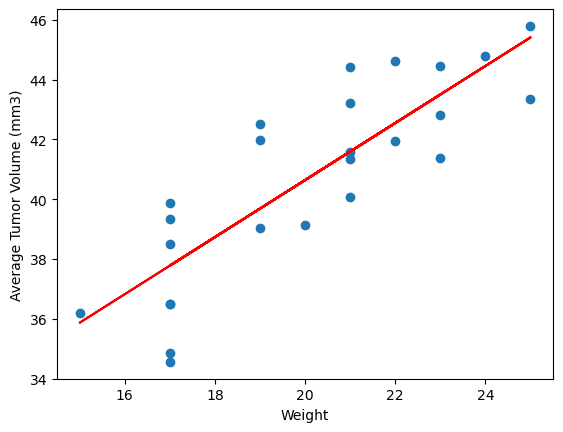

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# get the linear regression model
results = st.linregress(average_weight, avg_tumor_volume)

# Convert array to a series for calculations
avg_weight = pd.Series(average_weight)

# Calculate and print the correlation coefficient 
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(avg_weight,avg_tumor_volume)[0],2)}")

# Plot the scatter plot of the average weight and tumor volume
plt.scatter(avg_weight, avg_tumor_volume, c ="tab:blue")
plt.plot(avg_weight, results.intercept + results.slope*(avg_weight), 'r', label='fitted line')
plt.xlabel("Weight") 
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
